In [1]:
# importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import math 

In [2]:
data=pd.read_csv("breast_cancer_dataset.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
colnames=list(data.columns)
#colnames

In [4]:
class_labels=data['diagnosis']
class_M_data=data[data['diagnosis']=="M"]
class_B_data=data[data['diagnosis']=="B"]
ids=data['id']
data=data.drop(['id','diagnosis'],axis=1)
colnames.pop(0) #removing string columns
colnames.pop(0)

'diagnosis'

In [5]:
scale = StandardScaler()
scaled_data = scale.fit_transform(data)
df = pd.DataFrame(scaled_data, columns = colnames)
#df

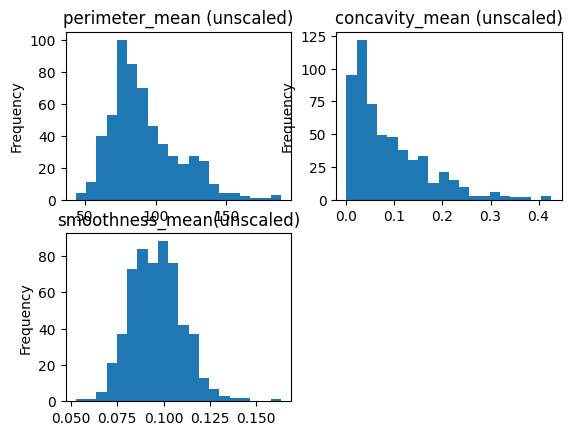

In [6]:
array_list=np.array([data["compactness_mean"].to_numpy(),data["perimeter_mean"].to_numpy(),data["concavity_worst"].to_numpy()])
#array_list

# Plot
plt.subplot(2,2,1)
plt.hist(data["perimeter_mean"], 20, histtype='bar')
plt.gca().set(title='perimeter_mean (unscaled)', ylabel='Frequency');

plt.subplot(2,2,2)
plt.hist(data["concavity_mean"], 20, histtype='bar')
plt.gca().set(title='concavity_mean (unscaled)', ylabel='Frequency');

plt.subplot(2,2,3)
plt.hist(data["smoothness_mean"], 20, histtype='bar')
plt.gca().set(title='smoothness_mean(unscaled)', ylabel='Frequency');

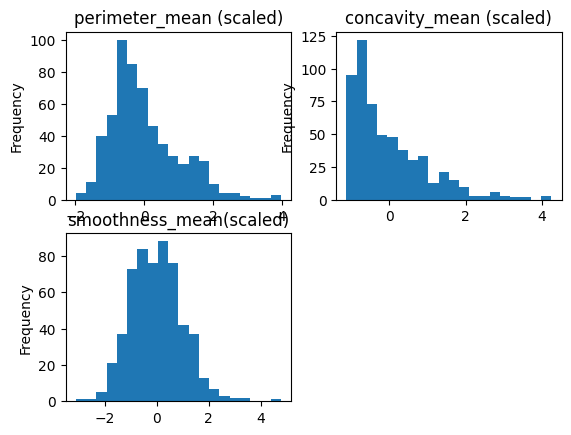

In [7]:
# Plot
plt.subplot(2,2,1)
plt.hist(df["perimeter_mean"], 20, histtype='bar')
plt.gca().set(title='perimeter_mean (scaled)', ylabel='Frequency');

plt.subplot(2,2,2)
plt.hist(df["concavity_mean"], 20, histtype='bar')
plt.gca().set(title='concavity_mean (scaled)', ylabel='Frequency');

plt.subplot(2,2,3)
plt.hist(df["smoothness_mean"], 20, histtype='bar')
plt.gca().set(title='smoothness_mean(scaled)', ylabel='Frequency');

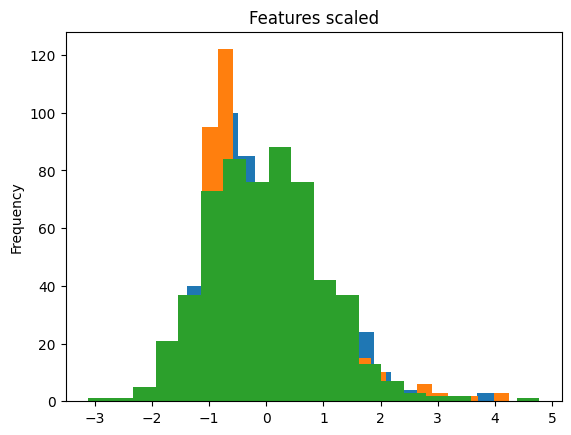

In [8]:
# Plot
plt.hist(df["perimeter_mean"], 20, histtype='bar')
plt.hist(df["concavity_mean"], 20, histtype='bar')
plt.hist(df["smoothness_mean"], 20, histtype='bar')
plt.gca().set(title='Features scaled', ylabel='Frequency');

In [9]:
correl=data.corr()
correl

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [10]:
correl_array=correl.to_numpy()
ind = np.diag_indices_from(correl_array)
correl_array[ind]=0
correl_array=pd.DataFrame(correl_array,columns=colnames,index=colnames)
correl_array

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,0.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,0.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,0.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,0.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,0.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,0.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,0.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,0.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,0.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,0.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


C:\Users\praya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\praya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


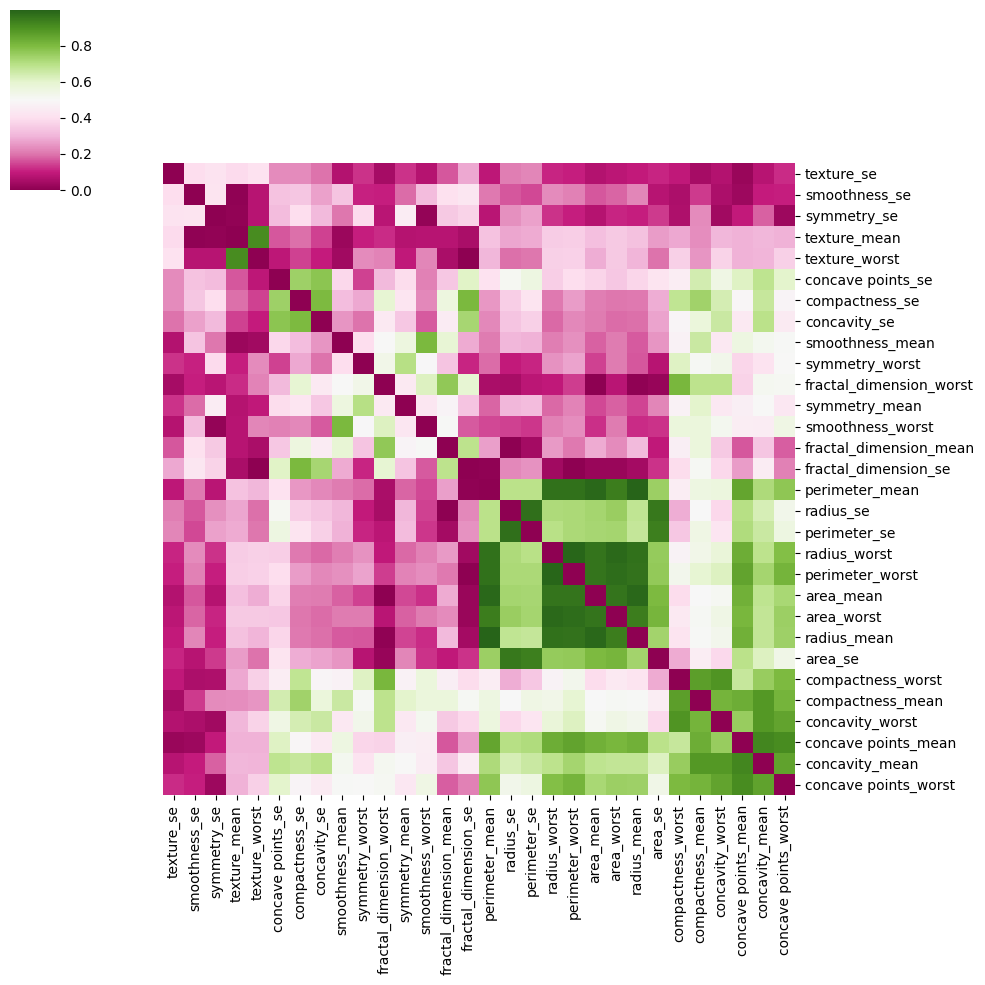

In [11]:
dataplot=sns.clustermap(abs(correl_array),cmap="PiYG",standard_scale=None,method='complete')
dataplot.ax_row_dendrogram.set_visible(False)
dataplot.ax_col_dendrogram.set_visible(False) 
# displaying heatmap
plt.show()

In [12]:
avg_correl=abs(correl_array).mean(axis=1)
indarr=np.where(avg_correl<0.35)
selectedFeatures=avg_correl.iloc[indarr]
selFeatList=(selectedFeatures.index).tolist()
print(selFeatList)
df2=df[selFeatList]
colnames2=list(df2.columns)
#df2.shape


['texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']


C:\Users\praya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\praya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


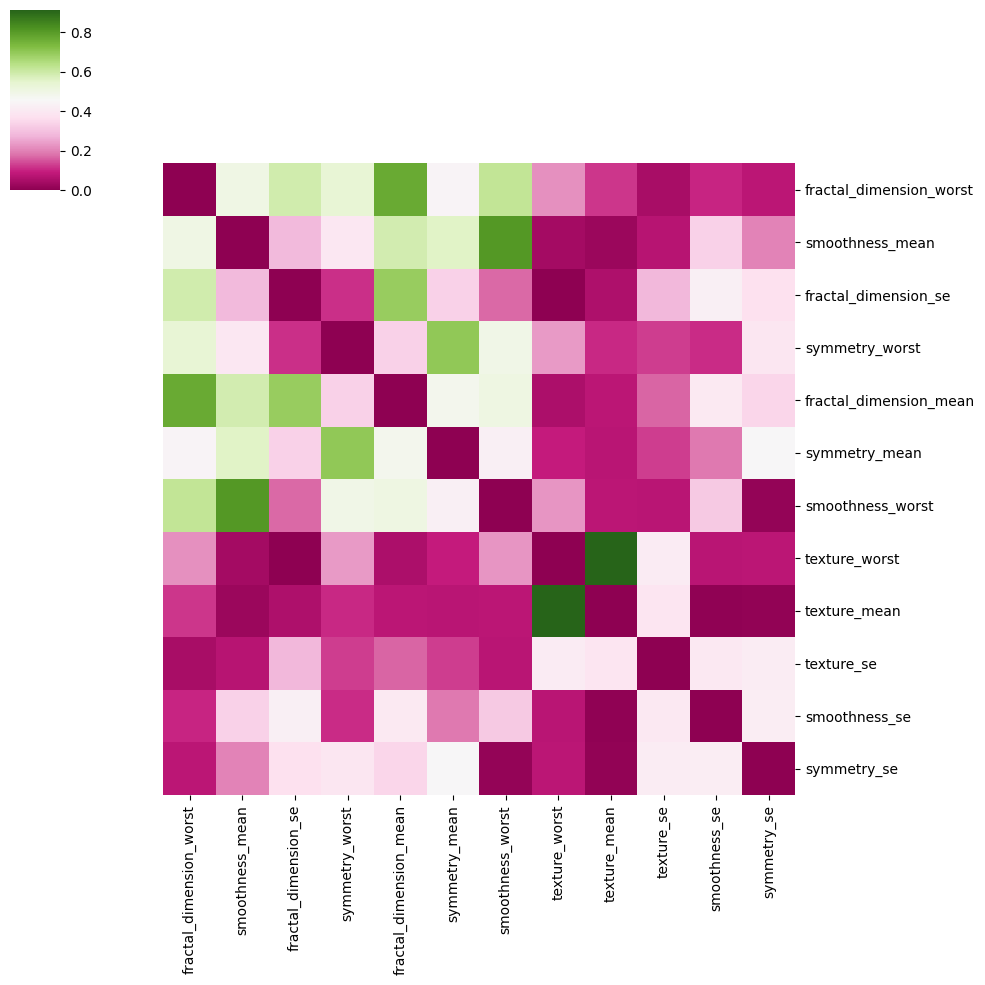

In [13]:
correl_array2= pd.DataFrame(correl_array,index=selFeatList,columns=selFeatList)
#print(correl_array2)
dataplot=sns.clustermap(abs(correl_array2),cmap="PiYG",standard_scale=None,method='complete')
dataplot.ax_row_dendrogram.set_visible(False)
dataplot.ax_col_dendrogram.set_visible(False) 
# displaying heatmap
plt.show()

In [14]:
X=df2.to_numpy()
y=class_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30,test_size=0.7)
#print(X.shape[0])
print((X_train.shape[0]/X.shape[0])*100)
X_test

29.876977152899826


array([[ 0.59348391, -1.61191727, -0.15194726, ..., -1.93529297,
        -0.86026408, -1.01775677],
       [-0.01620767,  1.98834244,  2.0568735 , ...,  0.99206785,
         2.17469235,  1.16673475],
       [-0.40948202,  0.30883801,  0.28616595, ...,  0.34329666,
        -0.01092926, -0.40485783],
       ...,
       [ 0.23046144,  0.55080051,  0.59284519, ...,  0.90439607,
         1.35609536,  1.03927837],
       [ 0.08618328, -1.15005355,  0.4249018 , ..., -1.18219236,
         0.24953342, -1.36410563],
       [ 0.11178102,  0.0825319 ,  0.24600557, ...,  0.47042075,
        -0.29565865,  0.53111532]])

In [15]:
n_neighbors=3
knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',metric='minkowski')
knn3.fit(X_train, y_train)

n_neighbors=7
knn7= neighbors.KNeighborsClassifier(n_neighbors, weights='distance',metric='minkowski')
knn7.fit(X_train, y_train)

n_neighbors=10
knn10= neighbors.KNeighborsClassifier(n_neighbors, weights='distance',metric='minkowski')
knn10.fit(X_train, y_train)

y_pred_3 = knn3.predict(X_test)
y_pred_7 = knn7.predict(X_test)
y_pred_10 = knn10.predict(X_test)


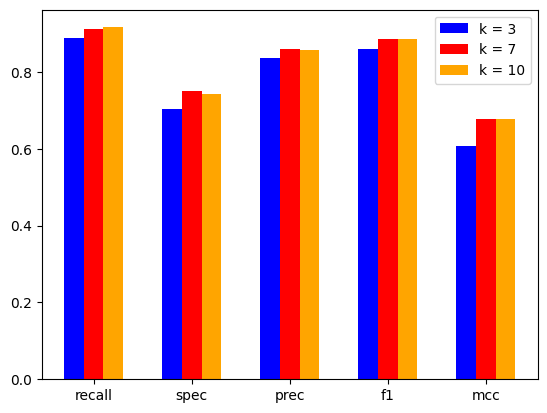

In [16]:
def mymetrics(pred_y,y_test_ref,class1,class2):
    TPctr=0
    FPctr=0
    TNctr=0
    FNctr=0
    for i in range(0,len(pred_y)):
        #print(i)
        if y_test_ref[i]==class1 and pred_y[i]==class1:
            TPctr=TPctr+1
        elif y_test_ref[i]==class1 and pred_y[i]==class2:
            FNctr=FNctr+1
        elif y_test_ref[i]==class2 and pred_y[i]==class2:
            TNctr=TNctr+1
        else:
            FPctr=FPctr+1

    classes=[class1,class2]
    CM=pd.DataFrame([[TPctr,FNctr],[TNctr,FPctr]],columns=classes,index=classes)
    recall=TPctr/(TPctr+FNctr)
    spec=TNctr/(TNctr+FPctr)
    prec=TPctr/(TPctr+FPctr)
    f1_score=2*prec*recall/(prec+recall)
    mcc=((TPctr*TNctr)-(FPctr*FNctr))/math.sqrt(((TPctr+FPctr)*(TNctr+FPctr)*(TPctr+FNctr)*(TNctr+FNctr)))
    return(CM,recall,spec,prec,f1_score,mcc)


class1="B"
class2="M"
y_test_ref=y_test.to_numpy()

pred_y=y_pred_3
CM1, recall1, spec1, prec1, f11, mcc1=mymetrics(pred_y,y_test_ref,class1,class2)

pred_y=y_pred_7
CM2, recall2, spec2, prec2, f12, mcc2=mymetrics(pred_y,y_test_ref,class1,class2)

pred_y=y_pred_10
CM3, recall3, spec3, prec3, f13, mcc3=mymetrics(pred_y,y_test_ref,class1,class2)

xax=np.arange(5)
plt.bar(xax-0.2,[recall1, spec1, prec1, f11, mcc1],width=0.2,color="blue")
plt.bar(xax,[recall2, spec2, prec2, f12, mcc2],width=0.2,color="red")
plt.bar(xax+0.2,[recall3, spec3, prec3, f13, mcc3],width=0.2,color="orange")

plt.xticks(xax, ["recall", "spec", "prec", "f1", "mcc"])
plt.legend(["k = 3", "k = 7","k = 10"])
plt.show()

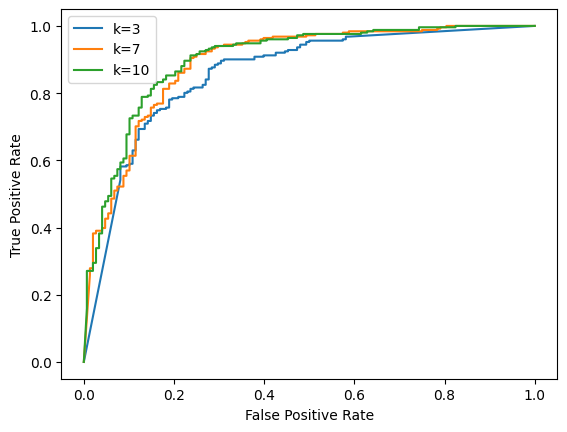

0.9008021966189297

In [18]:
probs3=knn3.predict_proba(X_test)
probs7=knn7.predict_proba(X_test)
probs10=knn10.predict_proba(X_test)
#print(probs)
#print(probs3.shape)
fpr, tpr, thresholds = roc_curve(y_test, probs3[:,0],pos_label="B")
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs7[:,0],pos_label="B")
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_test, probs10[:,0],pos_label="B")
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['k=3','k=7','k=10'])
plt.show()
auc(fpr, tpr)